In [4]:
print("Hello!, this is Implementation of Credit Card Fraud Detection")

Hello!, this is Implementation of Credit Card Fraud Detection


In [5]:
import pandas as pd

In [6]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('creditcard.csv')
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [10]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot  as plt

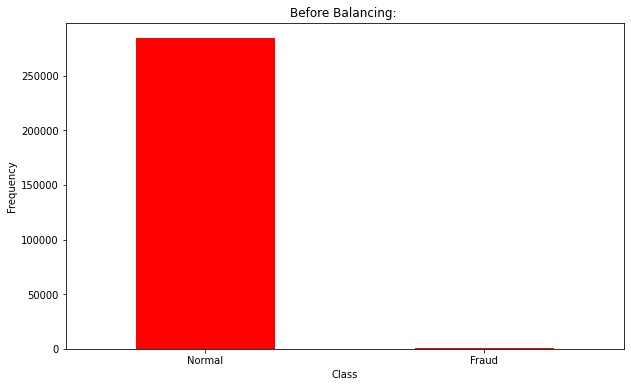

In [13]:
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0,color ='r',figsize = (10, 6))
plt.title("Before Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [14]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

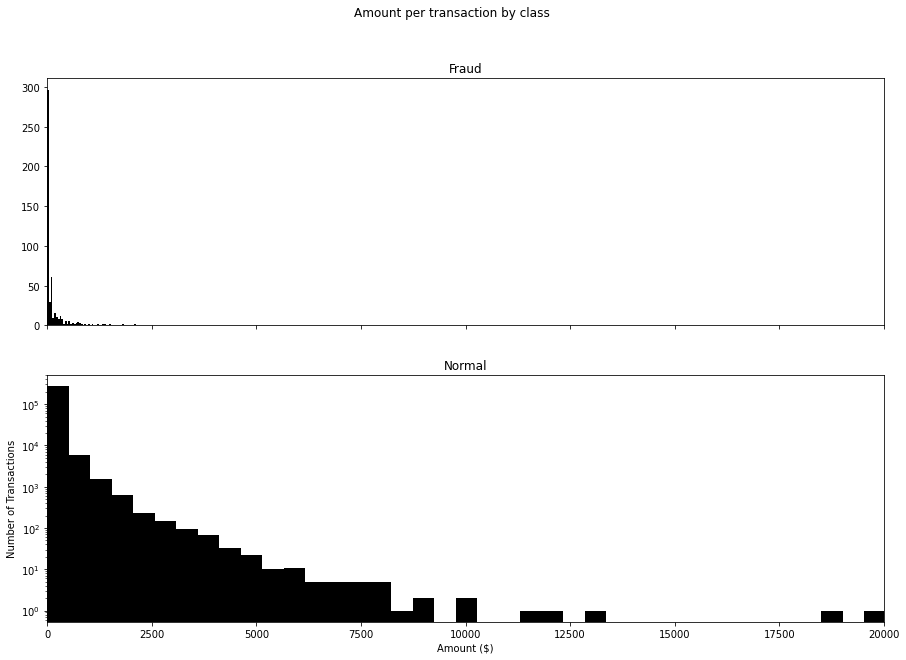

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize = (15, 10))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins,facecolor="black")
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins,facecolor="black")
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


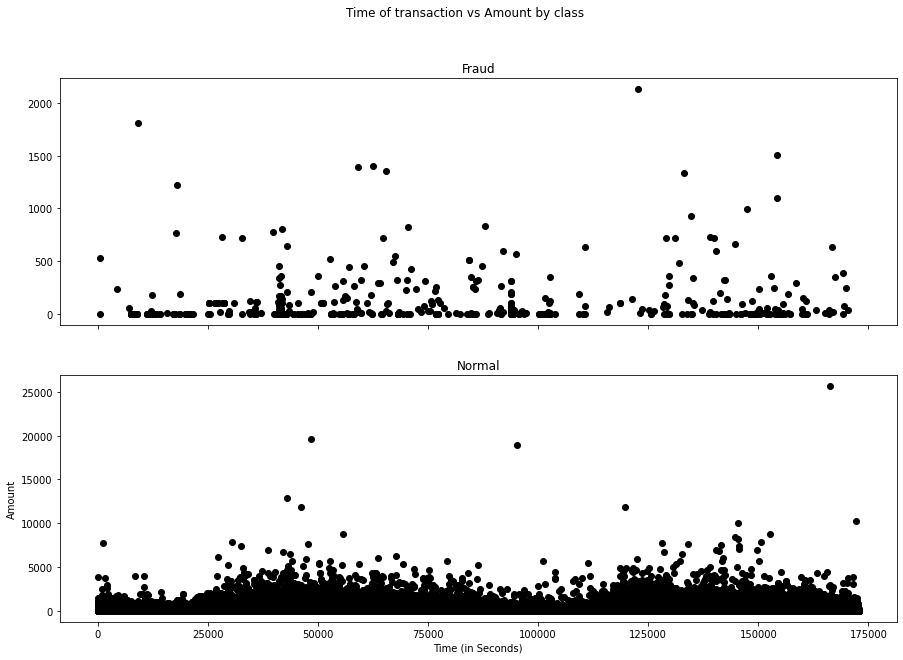

In [18]:
f,(ax1, ax2)= plt.subplots(2, 1,sharex=True, figsize = (15, 10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,facecolor="black")
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount,facecolor="black")
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

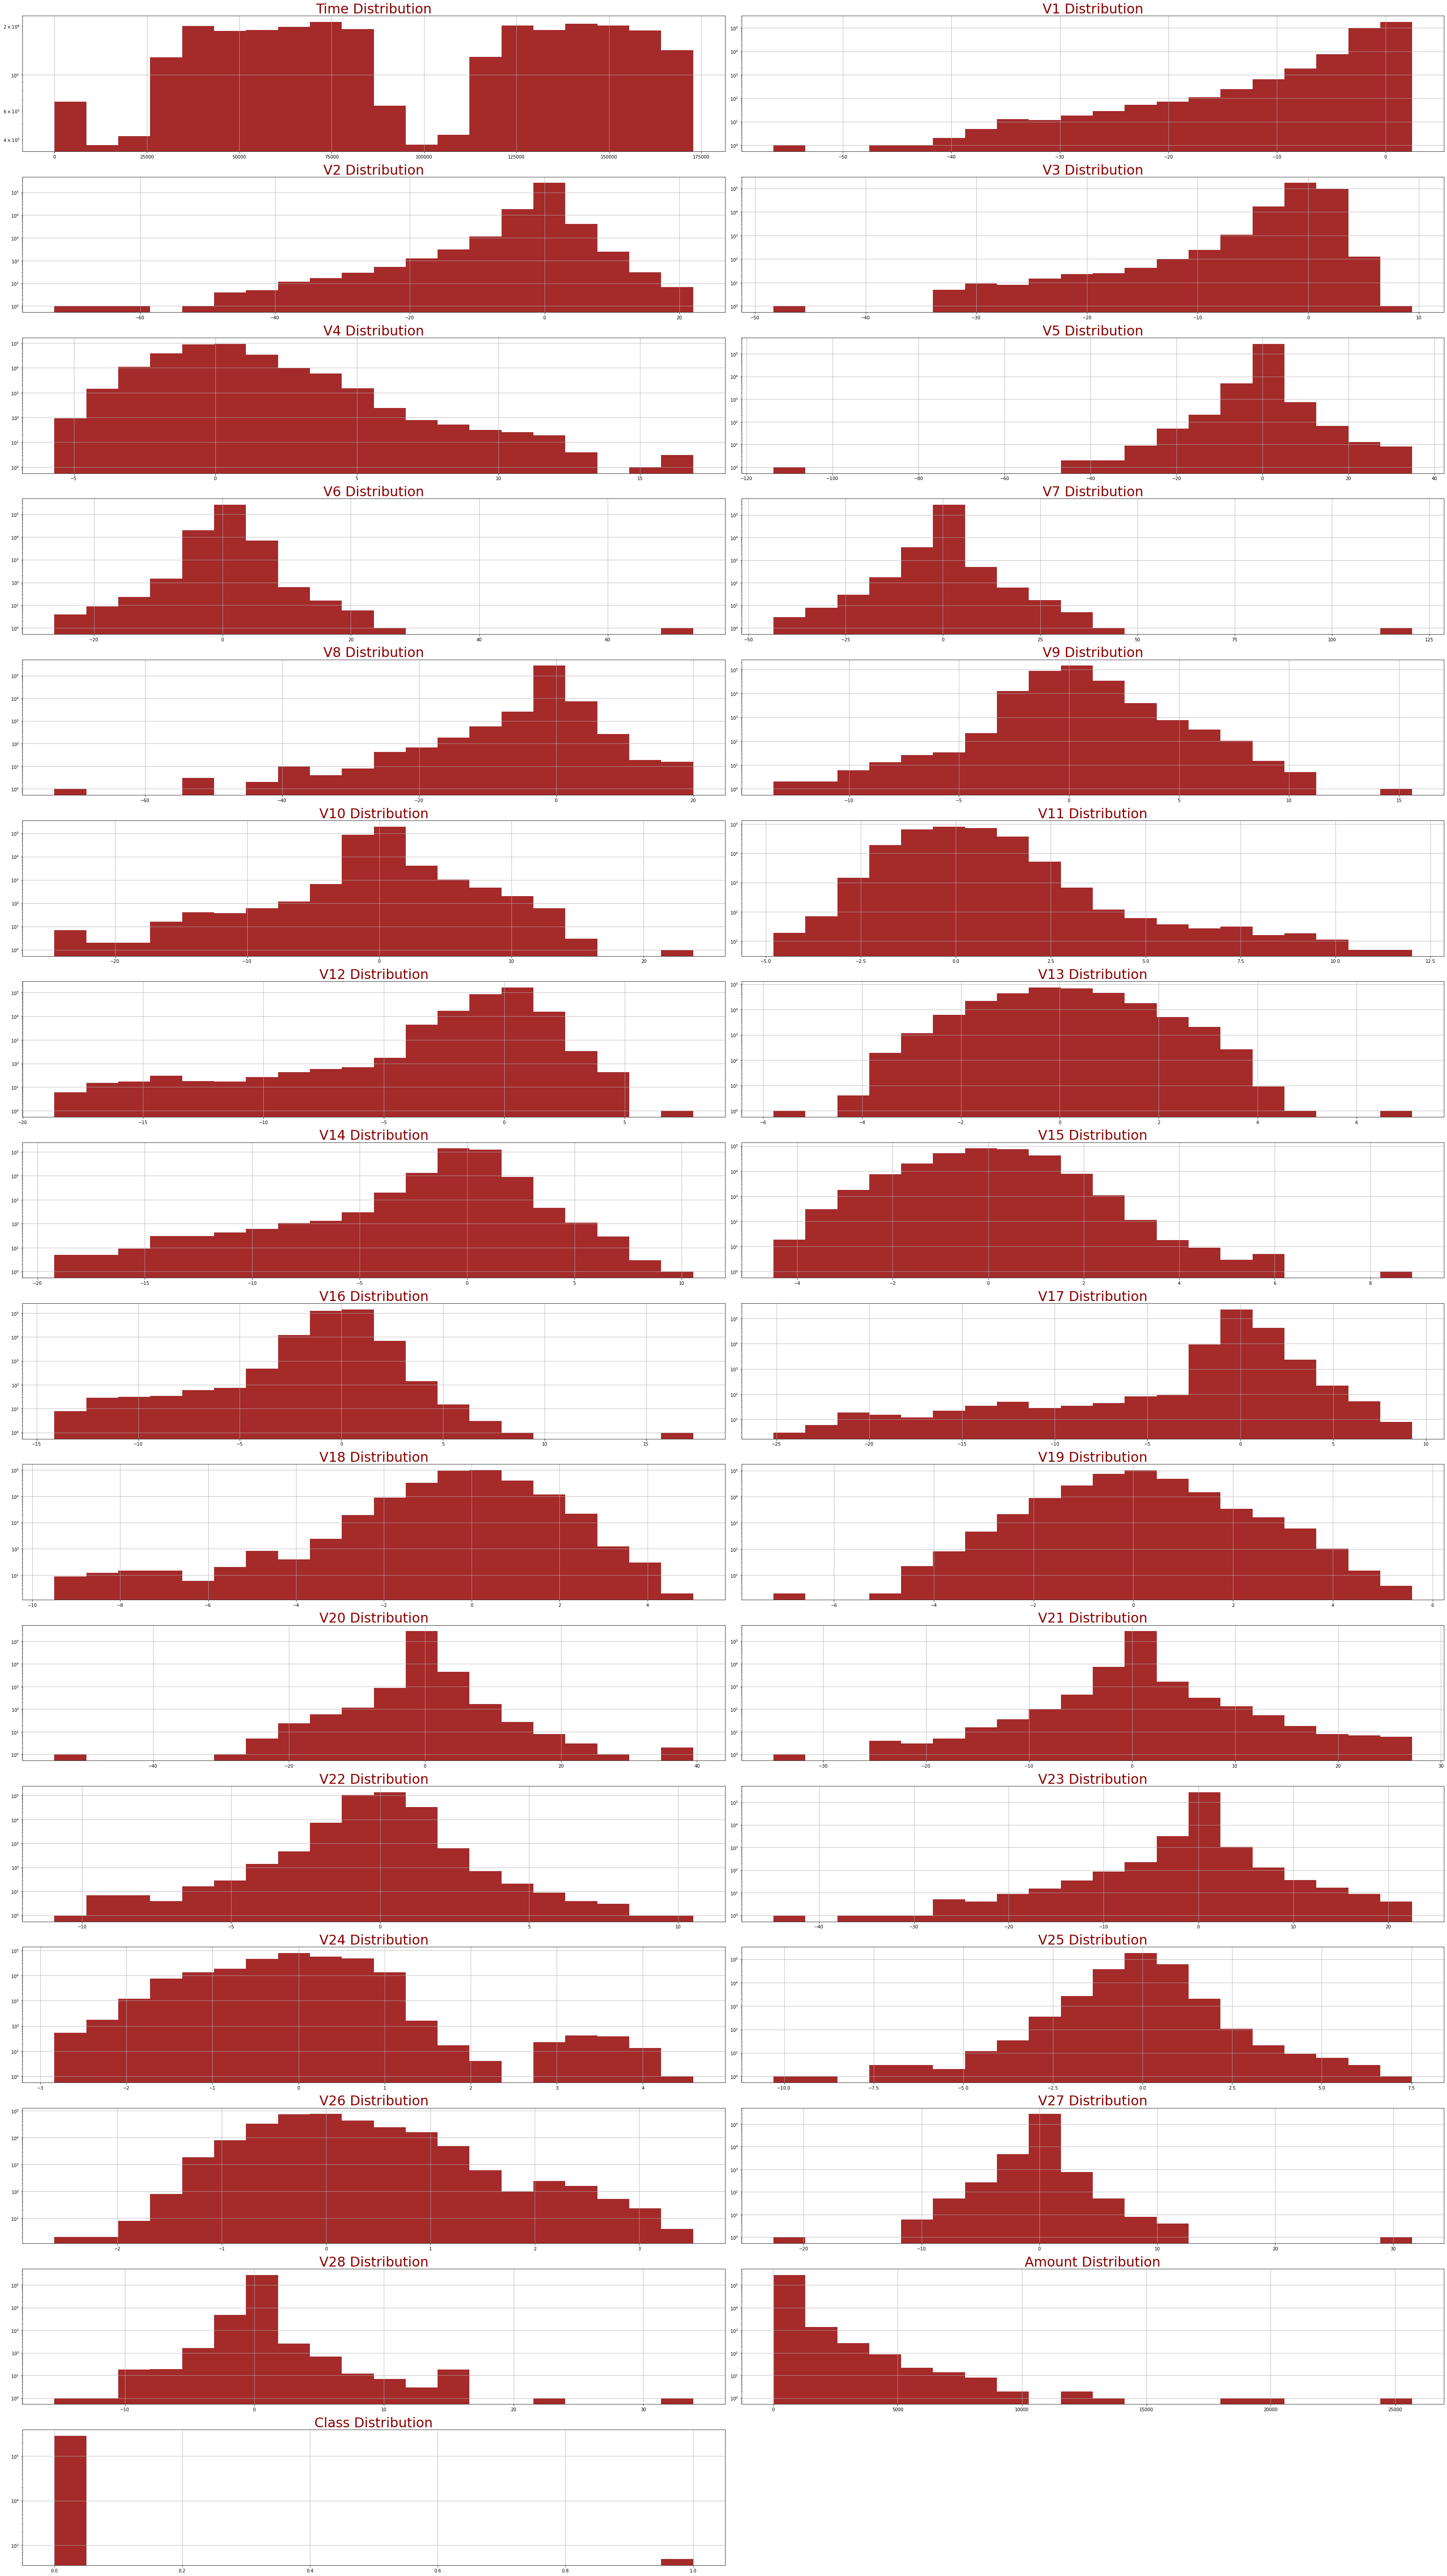

In [19]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(45,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='brown')
        ax.set_title(feature+" Distribution",color='DarkRed',fontsize=30)
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,16,2)

In [20]:
x=df.drop("Class",axis=1)
y=df.Class
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.50)

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

c:\users\hpw\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0 0 0 ... 0 0 0]
[0 1]
[142183    221]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142159
           1       0.71      0.64      0.67       245

    accuracy                           1.00    142404
   macro avg       0.85      0.82      0.83    142404
weighted avg       1.00      1.00      1.00    142404



In [22]:
from sklearn.ensemble  import RandomForestClassifier
logmodel = RandomForestClassifier()
logmodel.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
predictions = logmodel.predict(X_test)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 0 0 ... 0 0 0]
[0 1]
[142194    210]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142159
           1       0.93      0.80      0.86       245

    accuracy                           1.00    142404
   macro avg       0.97      0.90      0.93    142404
weighted avg       1.00      1.00      1.00    142404



In [25]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)

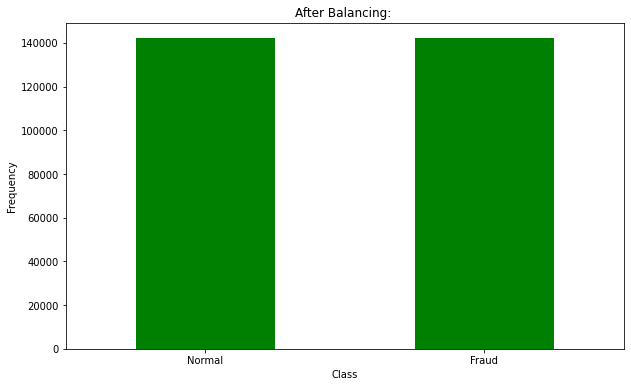

In [27]:
count_classes = pd.value_counts(y_train_ns, sort=True)
count_classes.plot(kind='bar', rot=0,color ='g',figsize = (10, 6))
plt.title("After Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [28]:
y_train_ns.value_counts()

0    142156
1    142156
Name: Class, dtype: int64

In [29]:
dataset=X_train_ns

In [30]:
dataset['Class']=y_train_ns

In [31]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,43896.000000,-0.651421,-0.313596,1.753987,-1.200682,-1.010027,0.667790,0.310004,0.251665,1.102449,...,0.390291,0.923008,0.036212,-0.772053,0.491658,-0.337382,0.038635,0.008641,200.000000,0
1,40972.000000,-1.579899,0.037529,1.524865,0.306081,0.296648,-1.448468,0.524962,-0.185433,-0.178677,...,-0.327931,-0.430400,0.880931,0.684968,-0.028308,0.074531,0.209674,0.007492,4.490000,0
2,117358.000000,1.881696,-0.349167,-1.189574,0.534668,-0.435709,-1.487156,0.223100,-0.342292,0.777614,...,0.325757,0.880789,0.003677,0.409852,0.114907,-0.128606,-0.034889,-0.042938,79.000000,0
3,41350.000000,-1.191083,-0.412963,1.069271,-2.617877,0.186853,-1.233230,0.625037,0.052269,0.675906,...,-0.086923,-0.581971,0.321149,-0.048316,-0.173033,-0.522861,0.271485,0.197930,120.000000,0
4,84798.000000,1.155329,0.233024,0.411944,1.391437,-0.101027,-0.164616,0.113754,-0.048947,0.203648,...,-0.092142,-0.012228,-0.073324,0.110794,0.680706,-0.315272,0.042653,0.018159,13.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284307,26618.913993,-19.948824,12.133923,-22.538601,6.119545,-15.208092,-4.351889,-15.688233,13.334187,-3.970646,...,1.751260,-1.417359,-0.816232,0.121996,1.357450,-0.224218,1.594425,0.475864,99.990000,1
284308,59726.457979,-3.093696,-0.772949,-1.570258,3.710047,0.228229,-1.164021,-4.579900,0.585278,-1.475429,...,0.514377,0.036034,-1.009158,-0.229496,-0.372768,-0.170953,0.788864,-0.300634,195.418345,1
284309,154098.797524,0.388531,-1.887834,-3.208360,1.121034,-0.987553,-1.203224,0.302766,-0.190770,0.502568,...,0.649652,0.058603,-0.621869,-0.033033,0.094807,-0.853608,0.089242,0.171301,695.909867,1
284310,29766.543233,0.359737,0.637373,-3.385749,1.807931,-3.361570,-0.717469,-4.098249,1.634330,0.784687,...,0.916356,1.413716,0.686098,0.177071,-1.743534,-0.530645,0.502360,-0.042446,31.548788,1


In [32]:
dataset.Class.value_counts()

0    142156
1    142156
Name: Class, dtype: int64

In [33]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
test_X=X_test
test_Y=y_test
test_Y.value_counts()

0    142159
1       245
Name: Class, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x,y)

LogisticRegression()

In [35]:
predictions = logmodel.predict(test_X)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 0 0 ... 0 0 0]
[0 1]
[139571   2833]


In [36]:
lr_pred_train = logmodel.predict(x)
lr_pred_test = logmodel.predict(test_X)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_Y, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,221,24
Not Fraud,2612,139547


In [38]:
import seaborn as sns


<AxesSubplot:>

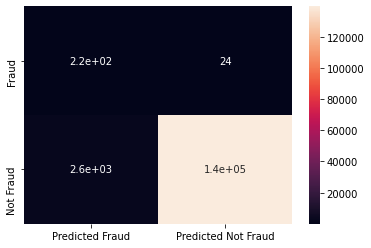

In [39]:
sns.heatmap(conf_matrix, annot=True)


In [40]:

lr_accuracy = accuracy_score(test_Y, lr_pred_test)
lr_accuracy

0.9814892840088761

In [41]:
lr_precision = precision_score(test_Y, lr_pred_test)
lr_precision

0.07800917755030004

In [42]:
lr_recall = recall_score(test_Y, lr_pred_test)
lr_recall

0.9020408163265307

In [43]:
lr_recall_train = recall_score(y, lr_pred_train)
lr_recall_train

0.9589324404175694

In [44]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(test_Y, lr_pred_test)
lr_f1

0.14359974009096815

In [49]:
lr_pred_test_prob = logmodel.predict_proba(test_X)[:, 1]


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
fpr, tpr, threshold = roc_curve(test_Y, lr_pred_test_prob)


In [53]:
lr_auc = roc_auc_score(test_Y, lr_pred_test_prob)
lr_auc

0.9791163415612096

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

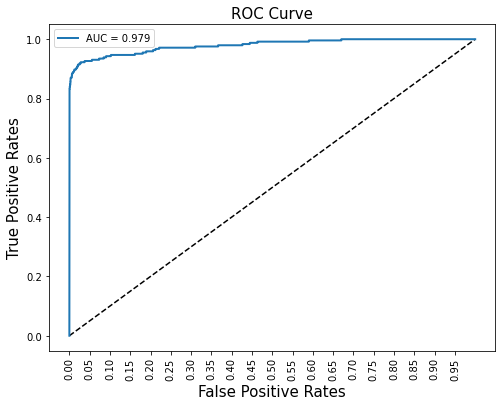

In [55]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)


In [45]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142159
           1       0.08      0.90      0.14       245

    accuracy                           0.98    142404
   macro avg       0.54      0.94      0.57    142404
weighted avg       1.00      0.98      0.99    142404



In [57]:
x1=dataset.drop("Class",axis=1)
y1=dataset["Class"]
test_X1=X_test
test_Y1=y_test
test_Y1.value_counts()

0    142159
1       245
Name: Class, dtype: int64

In [58]:
from sklearn.ensemble  import RandomForestClassifier
logmodel1 = RandomForestClassifier()
logmodel1.fit(x1,y1)

RandomForestClassifier()

In [59]:
predictions = logmodel1.predict(test_X1)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 0 0 ... 0 0 0]
[0 1]
[142171    233]


In [66]:
lr_pred_train1 = logmodel.predict(x1)
lr_pred_test1 = logmodel.predict(test_X1)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
tn1, fp1, fn1, tp1 = confusion_matrix(test_Y1, lr_pred_test1).ravel()
conf_matrix1 = pd.DataFrame(
    {
        'Predicted Fraud': [tp1, fp1],
        'Predicted Not Fraud': [fn1, tn1]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix1

,Predicted Fraud,Predicted Not Fraud
Fraud,221,24
Not Fraud,2612,139547


<AxesSubplot:>

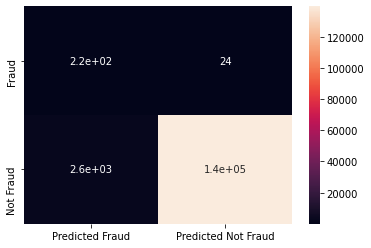

In [68]:
sns.heatmap(conf_matrix1, annot=True)

In [69]:

lr_accuracy1 = accuracy_score(test_Y1, lr_pred_test)
lr_accuracy1

0.9814892840088761

In [70]:
lr_precision1 = precision_score(test_Y1, lr_pred_test1)
lr_precision1

0.07800917755030004

In [71]:
lr_recall1 = recall_score(test_Y1, lr_pred_test1)
lr_recall1

0.9020408163265307

In [72]:
lr_recall_train1 = recall_score(y1, lr_pred_train1)
lr_recall_train1

0.9589324404175694

In [73]:
from sklearn.metrics import f1_score
lr_f2 = f1_score(test_Y1, lr_pred_test1)
lr_f2

0.14359974009096815

In [74]:
lr_pred_test_prob1 = logmodel.predict_proba(test_X1)[:, 1]


In [75]:
fpr1, tpr1, threshold1 = roc_curve(test_Y1, lr_pred_test_prob1)


In [76]:
lr_auc1 = roc_auc_score(test_Y1, lr_pred_test_prob1)
lr_auc1

0.9791163415612096

In [77]:
def plot_roc_curve(fpr1, tpr1, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

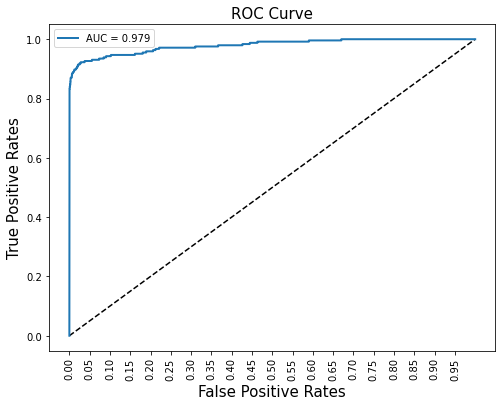

In [79]:
plot_roc_curve(fpr1=fpr1, tpr1=tpr1, label="AUC = %.3f" % lr_auc1)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142197
           1       0.85      0.82      0.83       207

    accuracy                           1.00    142404
   macro avg       0.92      0.91      0.92    142404
weighted avg       1.00      1.00      1.00    142404

